# Importing

In [23]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data', sep = '\t', names = ['label', 'message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['message'].head(20)

0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
5     FreeMsg Hey there darling it's been 3 week's n...
6     Even my brother is not like to speak with me. ...
7     As per your request 'Melle Melle (Oru Minnamin...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
10    I'm gonna be home soon and i don't want to tal...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
13    I've been searching for the right words to tha...
14                  I HAVE A DATE ON SUNDAY WITH WILL!!
15    XXXMobileMovieClub: To use your credit, click ...
16                           Oh k...i'm watching here:)
17    Eh u remember how 2 spell his name... Yes 

In [5]:
y = df['label'].value_counts().to_dict()

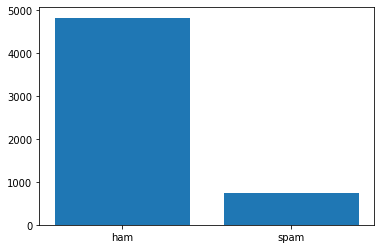

In [6]:
plt.bar(y.keys(), y.values())
plt.show()

# Processing

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
for index in df['message'].index:
    df['message'][index] = ' '.join([
        lemmatizer.lemmatize(word)
        for word in re.sub('[^a-zA-Z]', ' ', df['message'][index]).lower().split()
        if not word in stop_words
    ])

In [9]:
df.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [10]:
df['message'].head(20)

0     go jurong point crazy available bugis n great ...
1                               ok lar joking wif u oni
2     free entry wkly comp win fa cup final tkts st ...
3                   u dun say early hor u c already say
4                   nah think go usf life around though
5     freemsg hey darling week word back like fun st...
6         even brother like speak treat like aid patent
7     per request melle melle oru minnaminunginte nu...
8     winner valued network customer selected receiv...
9     mobile month u r entitled update latest colour...
10    gonna home soon want talk stuff anymore tonigh...
11    six chance win cash pound txt csh send cost p ...
12    urgent week free membership prize jackpot txt ...
13    searching right word thank breather promise wo...
14                                          date sunday
15    xxxmobilemovieclub use credit click wap link n...
16                                        oh k watching
17    eh u remember spell name yes v naughty mak

In [11]:
vectorizer = TfidfVectorizer()

In [12]:
vectorizer.fit(df['message'])

TfidfVectorizer()

In [15]:
df_message = vectorizer.transform(df['message'])

In [18]:
df_message = pd.DataFrame(df_message.toarray())

In [19]:
df_message.head()

,0,1,2,3,4,5,6,7,8,9,...,7088,7089,7090,7091,7092,7093,7094,7095,7096,7097
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_message.shape

(5572, 7098)

# Training

In [24]:
def check(df, test_size, random_state, model):
    x_train, x_test, y_train, y_test = train_test_split(
        df.drop('label', axis = 1),
        df['label'],
        test_size = test_size,
        random_state = random_state
    )
    model.fit(x_train, y_train)
    print(f'''Results for {model.__str__()} at {test_size}/{random_state}:
    Test: {accuracy_score(y_test, model.predict(x_test))}
    Train: {accuracy_score(y_train, model.predict(x_train))}\n''')

In [25]:
df_final = pd.concat([df.iloc[:, 0], df_message], axis = 1, join = 'inner')

In [27]:
check(df_final, 0.3, 42, MultinomialNB())
check(df_final, 0.3, 50, MultinomialNB())
check(df_final, 0.25, 50, MultinomialNB())
check(df_final, 0.28, 42, MultinomialNB())

check(df_final, 0.3, 42, LogisticRegression(max_iter = 500))
check(df_final, 0.3, 50, LogisticRegression(max_iter = 500))
check(df_final, 0.25, 50, LogisticRegression(max_iter = 500))
check(df_final, 0.28, 42, LogisticRegression(max_iter = 500))

Results for MultinomialNB() at 0.3/42:
    Test: 0.9712918660287081
    Train: 0.9733333333333334

Results for MultinomialNB() at 0.3/50:
    Test: 0.9700956937799043
    Train: 0.9743589743589743

Results for MultinomialNB() at 0.25/50:
    Test: 0.9698492462311558
    Train: 0.9753529552524527

Results for MultinomialNB() at 0.28/42:
    Test: 0.9718129404228059
    Train: 0.9738219895287958

Results for LogisticRegression(max_iter=500) at 0.3/42:
    Test: 0.9611244019138756
    Train: 0.9692307692307692

Results for LogisticRegression(max_iter=500) at 0.3/50:
    Test: 0.9641148325358851
    Train: 0.9664102564102565

Results for LogisticRegression(max_iter=500) at 0.25/50:
    Test: 0.9626704953338119
    Train: 0.9696099545345777

Results for LogisticRegression(max_iter=500) at 0.28/42:
    Test: 0.9615631005765535
    Train: 0.9695836449763151

